In [18]:
# Import our dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import plotly.express as px
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Read the cleansed Products dataset
file_path = "../instacart-data/Orders.csv"
orders_df = pd.read_csv(file_path)
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
# Clean Orders Dataset
cleanedorders_df = orders_df.dropna()
cleanedorders_df.to_csv("CleanedOrders.csv")
trained_orders_df = cleanedorders_df.loc[cleanedorders_df.eval_set == 'train']
trained_orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [21]:
# Read the order_products__train dataset
file_path = "../instacart-data/order_products__train.csv"
orders_t_df = pd.read_csv(file_path)

# Remove null values
orders_t_df = orders_t_df.dropna()
orders_t_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [22]:
# Merge Training Orders Dataset with Orders_train to include user_id.
cust_orders_df = trained_orders_df.merge(orders_t_df, how="inner", on="order_id")
cust_orders_df
cust_orders_df.to_csv("CustOrders_train.csv")

In [23]:
cust_orders_df = cust_orders_df.drop(columns = ["eval_set", "order_id", "order_number"])
cust_orders_df

,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1,4,8,14.0,196,1,1
1,1,4,8,14.0,25133,2,1
2,1,4,8,14.0,38928,3,1
3,1,4,8,14.0,26405,4,1
4,1,4,8,14.0,39657,5,1
...,...,...,...,...,...,...,...
1384612,206209,6,14,30.0,40603,4,0
1384613,206209,6,14,30.0,15655,5,0
1384614,206209,6,14,30.0,42606,6,0
1384615,206209,6,14,30.0,37966,7,0


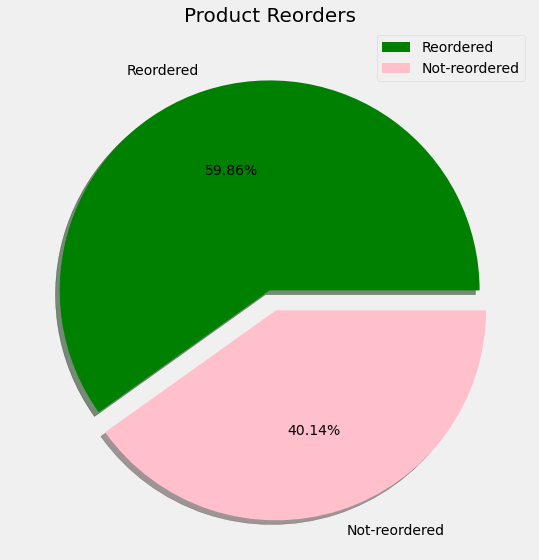

In [24]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

labels = ['Reordered', 'Not-reordered']
size = cust_orders_df['reordered'].value_counts()
colors = ['green', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Product Reorders', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [25]:
labels = ['Reordered', 'Not-reordered']
size = cust_orders_df['order_dow'].value_counts()

day_weeks = cust_orders_df.order_dow.drop_duplicates()

px.bar(cust_orders_df, x = day_weeks,y=size, height=400, labels={'day_weeks':'Days of the week', 'size':'Orders'})

In [26]:
X = cust_orders_df.drop("reordered", axis=1)
#X = X.drop("add_to_cart_order", axis=1)
y = pd.DataFrame(cust_orders_df["reordered"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 1.36476862, -1.24737002, -0.37260903, -0.19838105,  0.90054218,
        -0.77541148],
       [ 1.31135417,  0.13623957, -0.8444397 , -1.3493924 ,  0.12390496,
        -0.91007759],
       [-0.69150307,  1.51984915,  1.042883  ,  0.95263031, -0.49311337,
         0.16725132],
       ...,
       [ 1.12346234,  0.59744276,  0.09922165, -1.25347478,  0.1705726 ,
         0.0325852 ],
       [ 0.58417466,  1.51984915,  0.80696766,  1.24038314, -0.12706634,
        -0.50607925],
       [ 0.36165925,  1.51984915,  0.80696766, -1.54122762, -1.11324759,
        -0.23674702]])

In [28]:
len(X_train_scaled[0])

6

In [35]:
def setup_nn_model(input_features:int, layer1:int, layer2:int, add_layers:int, 
                   actv_fun1:str, actv_func2:str, output_func:str,)->float:

    # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
    number_input_features = input_features
    hidden_nodes_layer1 = layer1
    hidden_nodes_layer2 = layer2

    nn = tf.keras.models.Sequential()

    # First hidden layer
    nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features ,activation=actv_fun1))

    # Second hidden layer
    nn.add(
        tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=actv_func2 )
    )
    if (add_layers == 1):
        nn.add(
        tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=actv_func2 )
    )
        
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation=output_func))
    
    return nn


In [36]:
# Define a Training Function for the Neural Network
def train_nn(model:float, num_epochs:int):
    # Import checkpoint dependencies
    import os
    from tensorflow.keras.callbacks import ModelCheckpoint

    # Define the checkpoint path and filenames
    os.makedirs("checkpoints/",exist_ok=True)
    checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

    # Create a callback that saves the model's weights every 5 epochs
    cp_callback = ModelCheckpoint(
        filepath=checkpoint_path,
        verbose=1,
        save_weights_only=True,
        save_freq=50000)
    
    # Compile the model
    nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    
    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs, callbacks=[cp_callback])
    
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    
    # Export our model to HDF5 file
    nn.save("CustReordering.h5")

In [37]:
import NNFunctions

# Attempt 1 - 
nn = NNFunctions.setup_nn_model(len(X_train_scaled[0]), 21, 14, 1, "relu", "relu", "sigmoid")

# Check the structure of the model
nn.summary()

#Train the NN
#NNFunctions.train_nn(nn, 10)
train_nn(nn, 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 21)                147       
_________________________________________________________________
dense_29 (Dense)             (None, 14)                308       
_________________________________________________________________
dense_30 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 15        
Total params: 680
Trainable params: 680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
32452/32452 [==============================] - 57s 2ms/step - loss: 0.6493 - accuracy: 0.6257
Epoch 2/10
17535/32452 [===============>..............] - ETA: 23s - loss: 0.6460 - accuracy: 0.6306
Epoch 00002: saving model to checkpoints\weights

In [38]:
# Testing other models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [40]:
# Use XGBoost

In [ ]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")